## Analisis Cluster menggunakan Metode KMeans pada Kepolisian Daerah Republik Indonesia menurut Indikator Kriminalitas Tahun 2018 ##

#### Melakukan import package yang dibutuhkan saat analisis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import numpy as np
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from IPython import get_ipython

#%matplotlib inline
#%matplotlib widget
#get_ipython().run_line_magic('matplotlib', 'inline')
sns.set()
plt.style.use('ggplot')

#### Import data yang akan digunakan, yaitu indikator-indikator kriminalitas pada setiap Kepolisian Daerah yang diambil dari Badan Pusat Statistik Republik Indonesia 

In [2]:
df = pd.read_excel('null.xlsx',sheet_name=1)
df.head()

,Polda,kjhtnyawa,kjhtfisik,kjhtkmrdkn,kjhtbrg,kjhtnkt
0,Aceh,27,1764,349,3238,1544
1,Sumatera Utara,92,5633,243,12361,5907
2,Sumatera Barat,14,2371,501,7511,592
3,Riau,28,791,108,2389,1173
4,Jambi,24,1015,338,3913,712


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
Polda         33 non-null object
kjhtnyawa     33 non-null int64
kjhtfisik     33 non-null int64
kjhtkmrdkn    33 non-null int64
kjhtbrg       33 non-null int64
kjhtnkt       33 non-null int64
dtypes: int64(5), object(1)
memory usage: 1.7+ KB


In [4]:
df = df.rename({'Polda': 'Kepolisian Daerah'}, axis=1)

In [5]:
df=df.drop('kjhtbrg',1)

In [6]:
df.head()

,Kepolisian Daerah,kjhtnyawa,kjhtfisik,kjhtkmrdkn,kjhtnkt
0,Aceh,27,1764,349,1544
1,Sumatera Utara,92,5633,243,5907
2,Sumatera Barat,14,2371,501,592
3,Riau,28,791,108,1173
4,Jambi,24,1015,338,712


In [7]:
df_1=df.iloc[:,1:]
df_1.head()

,kjhtnyawa,kjhtfisik,kjhtkmrdkn,kjhtnkt
0,27,1764,349,1544
1,92,5633,243,5907
2,14,2371,501,592
3,28,791,108,1173
4,24,1015,338,712


In [8]:
df['index'] = df.index
df

,Kepolisian Daerah,kjhtnyawa,kjhtfisik,kjhtkmrdkn,kjhtnkt,index
0,Aceh,27,1764,349,1544,0
1,Sumatera Utara,92,5633,243,5907,1
2,Sumatera Barat,14,2371,501,592,2
3,Riau,28,791,108,1173,3
4,Jambi,24,1015,338,712,4
5,Sumatera Selatan,147,2043,336,1768,5
6,Bengkulu,37,395,99,192,6
7,Lampung,50,401,171,1744,7
8,Kep. Bangka Belitung,9,95,81,224,8
9,Kepulauan Riau,6,641,136,400,9


#### Melakukan uji bartlett yang berguna menguji homogenitas dalam data

In [9]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df_1)
chi_square_value, p_value

(44.70581501041603, 2.4482945552256535e-08)

#### Melakukan uji Kaiser-Meyer-Olkin (KMO) untuk mengetahui apakah sampel yang digunakan telah mewakili populasi

In [10]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model=calculate_kmo(df_1)

In [11]:
kmo_model

0.5761964869846902

#### Menguji multikolinearitas dalam data, apakah terdapat gejala multikolinearitas atau tidak

In [12]:
df_1_corr=df_1.corr()

In [13]:
pd.DataFrame(np.linalg.inv(df_1_corr.values),index=df_1_corr.index, columns=df_1_corr.columns)

,kjhtnyawa,kjhtfisik,kjhtkmrdkn,kjhtnkt
kjhtnyawa,1.681425,-0.245683,-0.524776,-0.651520
kjhtfisik,-0.245683,2.364124,-1.301478,-0.864221
kjhtkmrdkn,-0.524776,-1.301478,1.990302,0.667058
kjhtnkt,-0.651520,-0.864221,0.667058,1.658552


#### Melakukan plot awal pada data

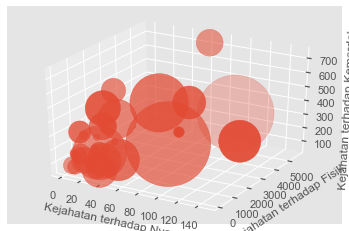

In [14]:
fig = plt.figure()
ax = plt.axes(projection="3d")
plt.rcParams["figure.figsize"] = (10,10)

z_points = df_1['kjhtkmrdkn']
x_points = df_1['kjhtnyawa']
y_points = df_1['kjhtfisik']
ax.scatter3D(x_points, y_points, z_points, s=df_1['kjhtnkt'],c=None, cmap='hsv');
ax.set_xlabel('Kejahatan terhadap Nyawa')
ax.set_ylabel('Kejahatan terhadap Fisik')
ax.set_zlabel('Kejahatan terhadap Kemerdekaan')

plt.show()

In [72]:
#f1 = df_1['kejahatan_terhadap_nyawa'].values
#f2 = df_1['kejahatan_terhadap_fisik'].values
#f3 = df_1['kejahatan_terhadap_kemerdekaan_orang'].values
#f4 = df_1['kejahatan_terhadap_hak_milik/barang'].values
#f5 = df_1['kejahatan_terkait_narkotika'].values
#X = np.array(list(zip(f1,f2)))
#plt.scatter(f1,f2,s=7)

fig = px.scatter_3d(df_1, x='kjhtnyawa', y='kjhtfisik', z='kjhtkmrdkn', size='kjhtbrg', color='kjhtnkt')
fig.update_layout(scene_zaxis_type="log")
fig.show()

(array([13.,  8.,  4.,  1.,  2.,  1.,  3.,  0.,  0.,  1.]),
 array([  1. ,  15.6,  30.2,  44.8,  59.4,  74. ,  88.6, 103.2, 117.8,
        132.4, 147. ]),
 <a list of 10 Patch objects>)

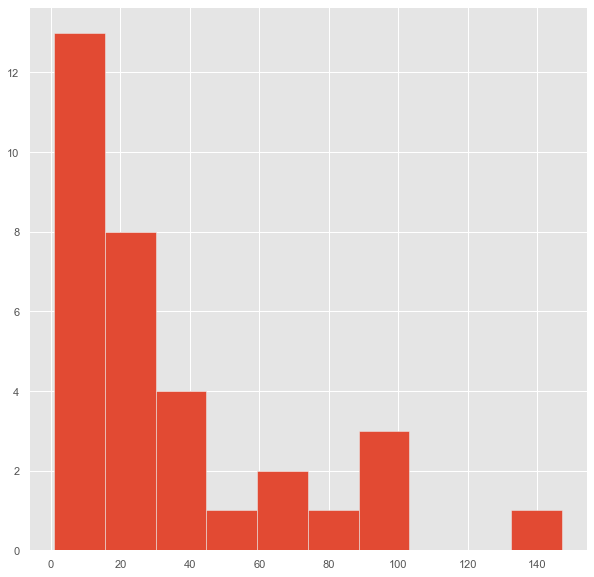

In [15]:
plt.hist(df_1['kjhtnyawa'])

(array([14.,  8.,  1.,  4.,  4.,  0.,  0.,  0.,  0.,  2.]),
 array([  95. ,  648.8, 1202.6, 1756.4, 2310.2, 2864. , 3417.8, 3971.6,
        4525.4, 5079.2, 5633. ]),
 <a list of 10 Patch objects>)

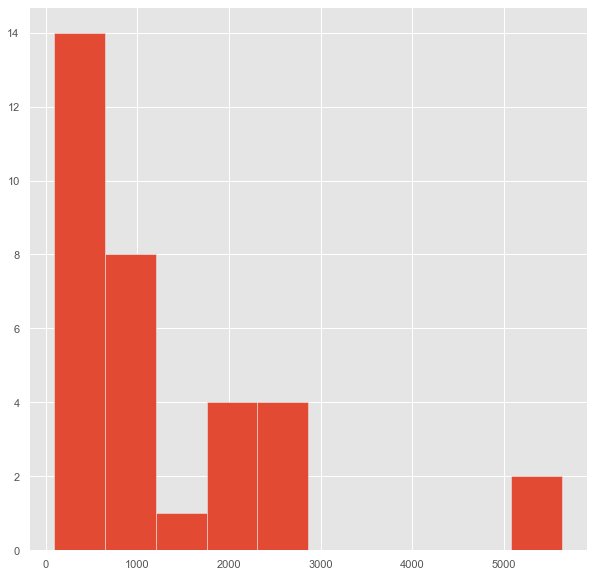

In [16]:
plt.hist(df_1['kjhtfisik'])

(array([22.,  4.,  3.,  0.,  2.,  0.,  0.,  0.,  1.,  1.]),
 array([2.0000e+00, 7.2320e+02, 1.4444e+03, 2.1656e+03, 2.8868e+03,
        3.6080e+03, 4.3292e+03, 5.0504e+03, 5.7716e+03, 6.4928e+03,
        7.2140e+03]),
 <a list of 10 Patch objects>)

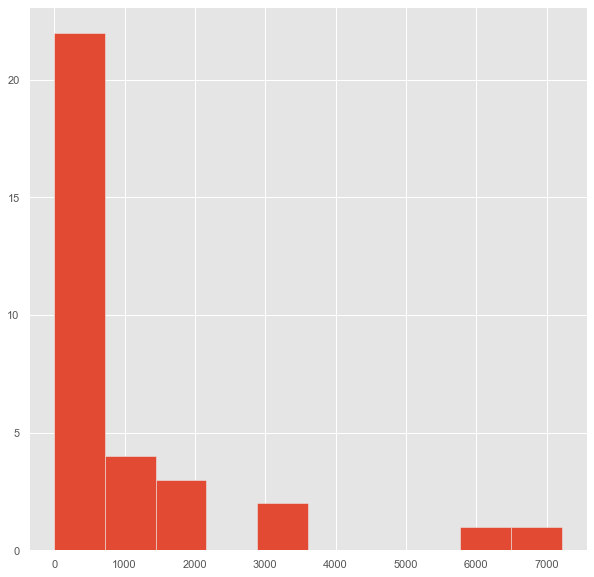

In [18]:
plt.hist(df_1['kjhtnkt'])

#### Melakukan analisis cluster dengan KMeans, dimulai dari k (banyaknya cluster) 2 sampai 4

(array([8., 7., 6., 2., 4., 1., 4., 0., 0., 1.]),
 array([ 62. , 128.5, 195. , 261.5, 328. , 394.5, 461. , 527.5, 594. ,
        660.5, 727. ]),
 <a list of 10 Patch objects>)

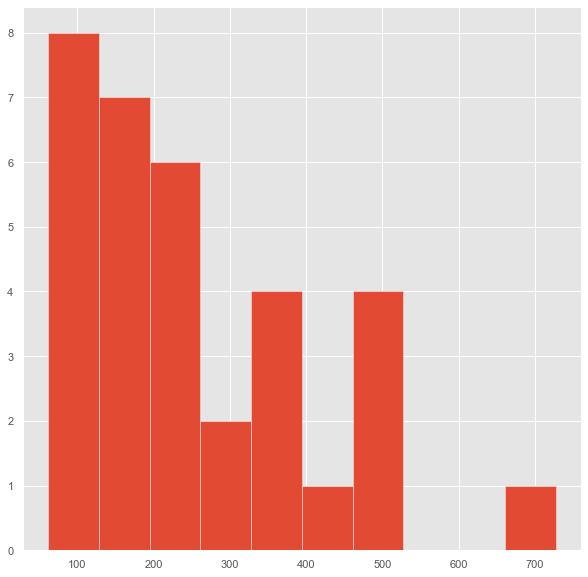

In [17]:
plt.hist(df_1['kjhtkmrdkn'])

In [19]:
k=2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
polda=df['Kepolisian Daerah']

labels1=pd.DataFrame(labels,columns=['Cluster'])
df_2=pd.concat([polda,labels1],axis=1)
df_2

,Kepolisian Daerah,Cluster
0,Aceh,0
1,Sumatera Utara,1
2,Sumatera Barat,0
3,Riau,0
4,Jambi,0
5,Sumatera Selatan,0
6,Bengkulu,0
7,Lampung,0
8,Kep. Bangka Belitung,0
9,Kepulauan Riau,0


In [20]:
labels=kmeans.predict(df_1)
labels

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [22]:
Centroids=kmeans.cluster_centers_
C_0=Centroids[:,0]
C_1=Centroids[:,1]
C_2=Centroids[:,2]
C_3=Centroids[:,3]

In [23]:
C_0

array([29.55172414, 73.25      ])

In [24]:
Centroids

array([[  29.55172414,  933.55172414,  223.82758621,  626.51724138],
       [  73.25      , 3902.5       ,  414.5       , 4310.75      ]])

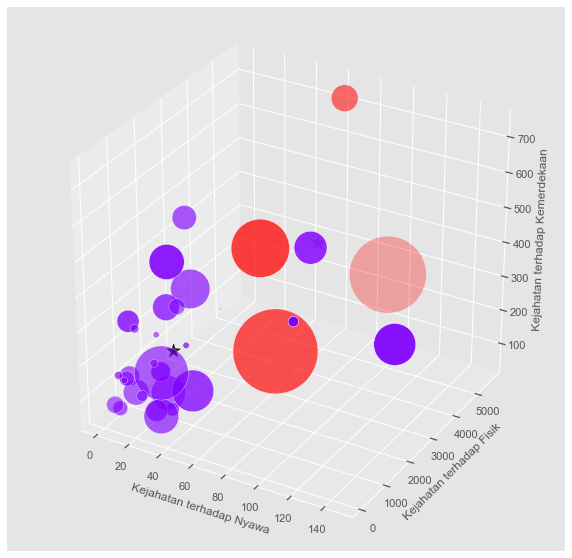

In [25]:
fig = plt.figure()
ax = plt.axes(projection="3d")
plt.rcParams["figure.figsize"] = (10,10)

z_points = df_1['kjhtkmrdkn']
x_points = df_1['kjhtnyawa']
y_points = df_1['kjhtfisik']
ax.scatter3D(x_points, y_points, z_points, s=df_1['kjhtnkt'], c=labels, cmap=plt.cm.rainbow, edgecolor='w');
ax.scatter3D(C_0, C_1, C_2, marker = '*', s = 200, c='k')

ax.set_xlabel('Kejahatan terhadap Nyawa')
ax.set_ylabel('Kejahatan terhadap Fisik')
ax.set_zlabel('Kejahatan terhadap Kemerdekaan')

plt.show()

#for i, txt in enumerate(df['index']):
#    plt.annotate(txt, (df_1['kjhtnyawa'][i], df_1['kjhtfisik'][i]))

In [26]:
k=3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df_1)
labels=kmeans.predict(df_1)

Centroids=kmeans.cluster_centers_
C_0=Centroids[:,0]
C_1=Centroids[:,1]
C_2=Centroids[:,2]
C_3=Centroids[:,3]

In [28]:
labels2=pd.DataFrame(labels,columns=['Cluster'])
df_3=pd.concat([polda,labels2],axis=1)
df_3

,Kepolisian Daerah,Cluster
0,Aceh,2
1,Sumatera Utara,1
2,Sumatera Barat,2
3,Riau,0
4,Jambi,0
5,Sumatera Selatan,2
6,Bengkulu,0
7,Lampung,0
8,Kep. Bangka Belitung,0
9,Kepulauan Riau,0


In [27]:
labels=kmeans.predict(df_1)
labels

array([2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0])

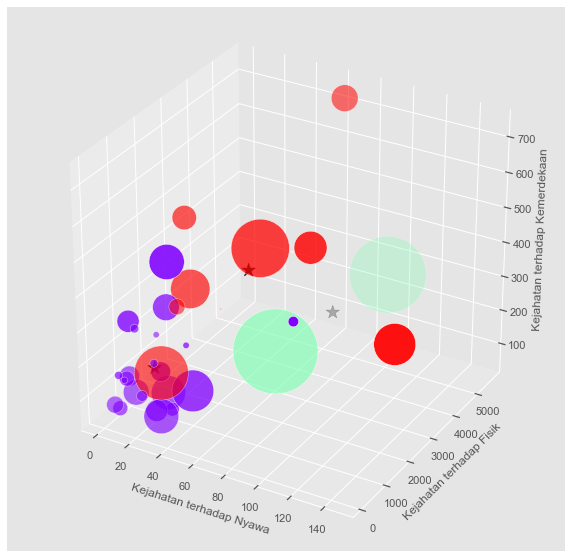

In [29]:
fig = plt.figure()
ax = plt.axes(projection="3d")
plt.rcParams["figure.figsize"] = (10,10)

z_points = df_1['kjhtkmrdkn']
x_points = df_1['kjhtnyawa']
y_points = df_1['kjhtfisik']
ax.scatter3D(x_points, y_points, z_points, s=df_1['kjhtnkt'], c=labels, cmap=plt.cm.rainbow, edgecolor='w');
ax.scatter3D(C_0, C_1, C_2, marker = '*', s = 200, c='k')

ax.set_xlabel('Kejahatan terhadap Nyawa')
ax.set_ylabel('Kejahatan terhadap Fisik')
ax.set_zlabel('Kejahatan terhadap Kemerdekaan')

plt.show()

In [30]:
Centroids

array([[  23.13636364,  591.        ,  187.68181818,  453.90909091],
       [  84.        , 3814.        ,  231.5       , 6560.5       ],
       [  52.55555556, 2450.33333333,  395.22222222, 1367.22222222]])

In [31]:
k=4
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(df_1)
labels=kmeans.predict(df_1)

Centroids=kmeans.cluster_centers_
C_0=Centroids[:,0]
C_1=Centroids[:,1]
C_2=Centroids[:,2]

In [33]:
labels3=pd.DataFrame(labels,columns=['Cluster'])
df_4=pd.concat([polda,labels3],axis=1)
df_4

,Kepolisian Daerah,Cluster
0,Aceh,2
1,Sumatera Utara,1
2,Sumatera Barat,2
3,Riau,0
4,Jambi,0
5,Sumatera Selatan,2
6,Bengkulu,0
7,Lampung,0
8,Kep. Bangka Belitung,0
9,Kepulauan Riau,0


In [32]:
labels=kmeans.predict(df_1)
labels

array([2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0])

In [34]:
Centroids

array([[  23.13636364,  591.        ,  187.68181818,  453.90909091],
       [  84.        , 3814.        ,  231.5       , 6560.5       ],
       [  51.        , 2064.125     ,  353.75      , 1448.5       ],
       [  65.        , 5540.        ,  727.        ,  717.        ]])

In [88]:
params(param_grid)

TypeError: 'dict' object is not callable